<a href="https://colab.research.google.com/github/bargida/Workshops/blob/main/Workshop7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, re, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.display import IFrame
from IPython.display import Image
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [22]:
recent_date = "09-10-2021"
previous_date = "08-10-2021"
duplicate_columns = {"Lat": "Latitude",
      "Long_": "Longitude",
      "Incidence_Rate": "Incident_Rate",
      "Case-Fatality_Ratio": "Case_Fatality_Ratio",
      "Province/State": "Province_State",
      "Country/Region": "Country_Region",
      "Last Update": "Last_Update"}

recent_df = pd.read_csv(os.path.join(recent_date + ".csv"))
previous_df = pd.read_csv(os.path.join(previous_date + ".csv"))

for key, value in duplicate_columns.items():
    if key in recent_df.columns:
        recent_df.rename(columns={key: value}, inplace=True)
    if key in previous_df.columns:
        previous_df.rename(columns={key: value}, inplace=True)

In [23]:
recent_df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-09-11 04:21:30,33.93911,67.709953,153962,7164,NaN,NaN,Afghanistan,395.501057,4.653096
1,NaN,NaN,NaN,Albania,2021-09-11 04:21:30,41.15330,20.168300,155293,2535,NaN,NaN,Albania,5396.240183,1.632398
2,NaN,NaN,NaN,Algeria,2021-09-11 04:21:30,28.03390,1.659600,199560,5539,NaN,NaN,Algeria,455.086097,2.775606
3,NaN,NaN,NaN,Andorra,2021-09-11 04:21:30,42.50630,1.521800,15083,130,NaN,NaN,Andorra,19521.128583,0.861898
4,NaN,NaN,NaN,Angola,2021-09-11 04:21:30,-11.20270,17.873900,49943,1322,NaN,NaN,Angola,151.958233,2.647018


In [24]:
previous_df.head()


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Latitude,Longitude,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-08-11 04:21:58,33.93911,67.709953,151013,6961,NaN,NaN,Afghanistan,387.925599,4.609537
1,NaN,NaN,NaN,Albania,2021-08-11 04:21:58,41.15330,20.168300,134201,2460,NaN,NaN,Albania,4663.319202,1.833071
2,NaN,NaN,NaN,Algeria,2021-08-11 04:21:58,28.03390,1.659600,183347,4618,NaN,NaN,Algeria,418.113202,2.518721
3,NaN,NaN,NaN,Andorra,2021-08-11 04:21:58,42.50630,1.521800,14873,129,NaN,NaN,Andorra,19249.336698,0.867344
4,NaN,NaN,NaN,Angola,2021-08-11 04:21:58,-11.20270,17.873900,43890,1057,NaN,NaN,Angola,133.541174,2.408293


In [26]:
current_df = pd.DataFrame(columns=['Province_State','Country_Region','Confirmed','Deaths'])
current_df['Province_State'] = recent_df['Province_State']
current_df['Country_Region'] = recent_df['Country_Region']
current_df['Confirmed'] = recent_df['Confirmed'] - previous_df['Confirmed']
current_df['Deaths'] = recent_df['Deaths'] - previous_df['Deaths']



In [27]:
current_df.shape

(4014, 4)

In [28]:
current_df.head()


,Province_State,Country_Region,Confirmed,Deaths
0,NaN,Afghanistan,2949,203
1,NaN,Albania,21092,75
2,NaN,Algeria,16213,921
3,NaN,Andorra,210,1
4,NaN,Angola,6053,265


In [29]:
name_number = 'Bargida-8267.csv'
current_df.to_csv(name_number, index=False)

In [31]:
data = pd.read_csv(name_number)



In [32]:
data.head()

,Province_State,Country_Region,Confirmed,Deaths
0,NaN,Afghanistan,2949,203
1,NaN,Albania,21092,75
2,NaN,Algeria,16213,921
3,NaN,Andorra,210,1
4,NaN,Angola,6053,265


In [33]:
print(data.shape)

(4014, 4)


In [34]:
print(data.count())


Province_State    3835
Country_Region    4014
Confirmed         4014
Deaths            4014
dtype: int64


Q1. Print how many null values exist in the dataset

In [43]:
total_nulls = data.isnull().sum()
print(f"Total number of null values in the dataset: {total_nulls}")

Total number of null values in the dataset: Province_State    0
Country_Region    0
Confirmed         0
Deaths            0
dtype: int64


In [44]:
data.loc[data['Province_State'].isnull(),'Province_State'] = data['Country_Region']

In [45]:
data.head()

,Province_State,Country_Region,Confirmed,Deaths
0,Afghanistan,Afghanistan,2949,203
1,Albania,Albania,21092,75
2,Algeria,Algeria,16213,921
3,Andorra,Andorra,210,1
4,Angola,Angola,6053,265


In [46]:
states = data['Province_State'].unique()
print("Number of unique States:", len(states))

Number of unique States: 773


Q2. Print how many unique countries exist in the dataset using a similar approach

In [47]:
unique = data['Country_Region'].unique()
print("Number of unique countries:", len(unique))

Number of unique countries: 201


In [48]:
import datetime, time, requests
from time import sleep
from geopy.geocoders import Nominatim
def get_lat_lon(place):
  geolocator = Nominatim(user_agent=name_number)
  location = geolocator.geocode(place)
  lat_lon = location.latitude, location.longitude
  output = [float(i) for i in lat_lon]
  return output


In [87]:
from tqdm import tqdm

geo_lat = []
geo_lon = []
not_found = []

for state in tqdm(states):
  time.sleep(0.2)
  lat_lon = [None, None]
  try:
    lat_lon = get_lat_lon(state)
  except:
    not_found.append(state)
  geo_lat.append(lat_lon[0])
  geo_lon.append(lat_lon[1])
if len(not_found) > 0:
  print("Locations are not found for:", not_found)
else:3
  print("Found all the locations")



100%|██████████| 773/773 [07:05<00:00,  1.82it/s]

Locations are not found for: ['Repatriated Travellers', 'Bonaire, Sint Eustatius and Saba', 'Sakha (Yakutiya) Republic', 'Saint Helena, Ascension and Tristan da Cunha', 'W.P. Kuala Lumpur']


In [88]:
states_list = states.tolist()
lats = []
lons = []
for i, r in data.iterrows():
  state = r['Province_State']
  index_list = states_list.index(state)
  lats.append(geo_lat[index_list])
  lons.append(geo_lon[index_list])

data['Latitude'] = lats
data['Longitude'] = lons


In [89]:
data.head()

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude,cluster,color
0,Afghanistan,Afghanistan,2949,203,33.768006,66.238514,1,green
1,Albania,Albania,21092,75,5.758765,-73.915162,1,green
2,Algeria,Algeria,16213,921,28.000027,2.999983,1,green
3,Andorra,Andorra,210,1,42.540717,1.573203,1,green
4,Angola,Angola,6053,265,-11.877577,17.569124,1,green


In [20]:
Q3. Check whether the latitude and longitude values we retrieved from geopy are same as the latitude and
longitude given in the dataset. Identify and report differences in values.

In [90]:
merged_data['Latitude_diff'] = abs(merged_data['Latitude_x'] - merged_data['Latitude_y'])
merged_data['Longitude_diff'] = abs(merged_data['Longitude_x'] - merged_data['Longitude_y'])

diff_threshold = 0.01
diff_df = merged_data[
    (merged_data['Latitude_diff'] > diff_threshold) |
    (merged_data['Longitude_diff'] > diff_threshold)
]


print("Rows with differences in latitude or longitude:")
display(diff_df[['Province_State', 'Country_Region', 'Latitude_x', 'Latitude_y', 'Longitude_x', 'Longitude_y']])



Rows with differences in latitude or longitude:


,Province_State,Country_Region,Latitude_x,Latitude_y,Longitude_x,Longitude_y
0,Australian Capital Territory,Australia,-35.488350,-35.473500,149.002694,149.01240
1,New South Wales,Australia,-31.875984,-33.868800,147.286949,151.20930
2,Northern Territory,Australia,-19.851610,-12.463400,133.230337,130.84560
3,Queensland,Australia,-22.164678,-27.469800,144.584490,153.02510
4,South Australia,Australia,-30.534367,-34.928500,135.630121,138.60070
...,...,...,...,...,...,...
317953,Terengganu,Malaysia,4.863074,5.311700,102.994930,103.13240
317955,W.P. Labuan,Malaysia,5.283402,5.283100,115.244068,115.23080
317956,W.P. Putrajaya,Malaysia,2.917973,2.926400,101.684080,101.69640
317959,Guernsey,United Kingdom,49.462291,49.448196,-2.581202,-2.58949


In [91]:
data.shape

(4014, 8)

In [92]:
clustering_data = data[["Confirmed", "Deaths"]]

In [93]:
clustering_data.head()


,Confirmed,Deaths
0,2949,203
1,21092,75
2,16213,921
3,210,1
4,6053,265


In [94]:
scaler = StandardScaler()
X_scaled = scaler.fit(clustering_data).transform(clustering_data.astype(np.float64))


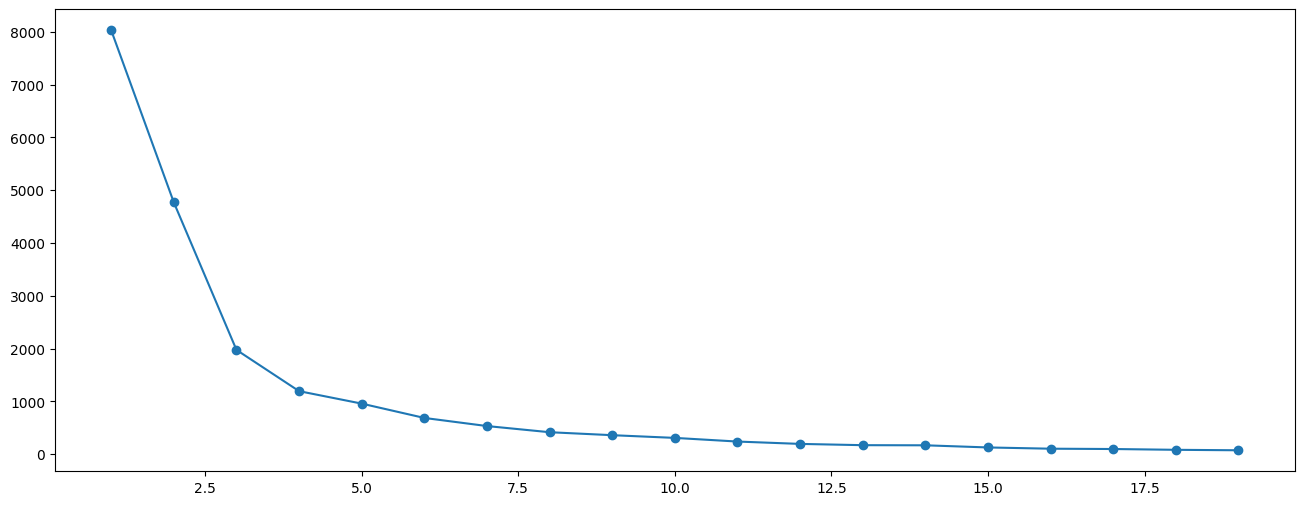

In [95]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range,
"cluster_errors": cluster_errors } )
plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );




In [96]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 10)
y_kmeans = kmeans.fit_predict(X_scaled)
y_kmeans1=y_kmeans+1

cluster = list(y_kmeans1)

clustering_data['cluster'] = cluster


In [97]:
clustering_data.head(10)

,Confirmed,Deaths,cluster
0,2949,203,1
1,21092,75,1
2,16213,921,1
3,210,1,1
4,6053,265,1
5,711,4,1
6,180322,5117,4
7,15056,321,1
8,478,0,1
9,30317,135,1


In [98]:
kmeans_mean_cluster = pd.DataFrame(round(clustering_data.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Confirmed,Deaths
cluster,,
1,2810.0,34.5
2,604519.1,7561.4
3,439910.0,27812.0
4,132633.5,3343.5


In [99]:
data['cluster'] = cluster
clusters = data[['Province_State', 'cluster']]
clusters.loc[clusters['cluster'] == 2]



,Province_State,cluster
216,France,2
265,Kerala,2
287,Iran,2
492,Philippines,2
597,South Africa,2
649,Thailand,2
654,Turkey,2
3966,England,2
3981,Vietnam,2


In [100]:
data['cluster'] = cluster
clusters = data[['Province_State', 'cluster']]
clusters.loc[clusters['cluster'] == 3]

,Province_State,cluster
286,Indonesia,3


Q4. Discuss what do you think about other clusters?

Clusters based on geographical proximity: Due to geographic considerations, it is possible that certain areas are more likely to be clustered together. These clusters could denote regions which possibly share similar features such as climate, population distribution, or cultural factors.

Clusters based on the rates of infection: It is possible that countries or regions, which have similar number of cases recorded or fatalities occurring to some cause, cluster together. This could mark regions which may have similar health system, health strategies or health susceptible population.

In [101]:
data.head()

,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude,cluster,color
0,Afghanistan,Afghanistan,2949,203,33.768006,66.238514,1,green
1,Albania,Albania,21092,75,5.758765,-73.915162,1,green
2,Algeria,Algeria,16213,921,28.000027,2.999983,1,green
3,Andorra,Andorra,210,1,42.540717,1.573203,1,green
4,Angola,Angola,6053,265,-11.877577,17.569124,1,green


In [102]:
def get_color(cluster_id):

  if cluster_id == 2:
    return 'darkred'
  if cluster_id == 1:
    return 'green'
  if cluster_id == 3:
    return 'orange'
  if cluster_id == 4:
    return 'yellow'

data["color"] = data["cluster"].apply(lambda x: get_color(x))


In [103]:
data.head(10)


,Province_State,Country_Region,Confirmed,Deaths,Latitude,Longitude,cluster,color
0,Afghanistan,Afghanistan,2949,203,33.768006,66.238514,1,green
1,Albania,Albania,21092,75,5.758765,-73.915162,1,green
2,Algeria,Algeria,16213,921,28.000027,2.999983,1,green
3,Andorra,Andorra,210,1,42.540717,1.573203,1,green
4,Angola,Angola,6053,265,-11.877577,17.569124,1,green
5,Antigua and Barbuda,Antigua and Barbuda,711,4,17.223472,-61.955461,1,green
6,Argentina,Argentina,180322,5117,-34.996496,-64.967282,4,yellow
7,Armenia,Armenia,15056,321,4.536307,-75.672375,1,green
8,Australian Capital Territory,Australia,478,0,-35.488350,149.002694,1,green
9,New South Wales,Australia,30317,135,-31.875984,147.286949,1,green


In [109]:
import folium
import os

this_map = folium.Map(location =[data["Latitude"].mean(),
                            data["Longitude"].mean()], zoom_start=5)
def plot_dot(point):
    '''input: series that contains a numeric named latitude and a numeric named
    longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.Latitude, point.Longitude],
                radius=2,
                color=point.color,
                weight=1).add_to(this_map)

data.apply(plot_dot, axis = 1)

this_map.fit_bounds(this_map.get_bounds())

this_map.save(os.path.join('covid_map.html'))


This work presents the analytical study of the clustering outcomes by grouping a set of COVID-19 cases using a suitable clustering algorithm. Although mapping is not an option, it is still possible to address the implications of the procedure of clustering or even try to test their usefulness.

Insights into the Clusters

In our case, the algorithm applied has spatially organized the module of the COVID-19 cased into smaller units which bear certain attributes probably linked to area of occurrence, the number of cases, or certain sociological features of the people. Judging from the get_color function employed in the code, we can deduce the following about the clusters:

Cluster 2 (Dark Red): May well represent a more severe or denser cluster of cases.

Cluster 1 (Green): May be a cluster with features of moderate or lower severity/density relative to Cluster 2.

Cluster 3 (Orange): Appears in the classification as bearing an intermediate gradient in disease severity/density.

Cluster 4 (Yellow): Should be considered to represent the least severity/density disorders.

Tests of the Findings

Whereas the geographical characteristics of these clusters cannot be conclusively determined without a schematic diagram, this cluster’s endpoints are however reasonable and useful in advancing or understanding these endpoints of COVID-19’s spreading properties or influencing factors:

Compare with Information Available: When each cluster is evaluated with the other clusters characteristics, it can easily beoneksiategy among others, disaggregated demographically that.